# <a href="https://thetahat.ru/courses/ad">Введение в анализ данных</a>
## Домашнее задание 4, часть 2. Нейронные сети.


**Правила, <font color="red">прочитайте внимательно</font>:**

* Выполненную работу нужно отправить телеграм-боту `@thetahat_ds25_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. Дождитесь подтверждения от бота, что он принял файл. Если подтверждения нет, то что-то не так. **Работы, присланные иным способом, не принимаются.**
* Дедлайн см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**. Если вы строите интерактивные графики, их стоит прислать в формате html.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания всем участникам списывания дается штраф -2 балла к итоговой оценке за семестр.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Обратите внимание на <a href="https://thetahat.ru/courses/ai-rules"><b>правила использования ИИ-инструментов</b></a> при решении домашнего задания.
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Решение проверяется системой ИИ-проверки <a href="https://thetahat.ru/"><img src="https://miptstats.github.io/theta_grader_small.png" style="display: inline; vertical-align: middle;"></a> **ThetaGrader**. Результат проверки валидируется и исправляется человеком, после чего комментарии отправляются студентам.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* **Код из рассказанных на занятиях ноутбуков** можно использовать без ограничений.

**Правила оформления теоретических задач:**

* Решения необходимо оформить в виде $\LaTeX$ в markdown-ячейках. Иные способы (в т.ч. фотографии) не принимаются.
* Если вы не знаете $\LaTeX$, используйте ИИ-инструменты для оформления черновика решения. Примеры были показаны на лекции 2 по ИИ-инструментам.
* **В решениях поясняйте, чем вы пользуетесь**, хотя бы кратко.
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.


<b><font size="5" color="red">Важно!!! Правила заполнения ноутбука:</font></b>
* Запрещается удалять имеющиеся в ноутбуке ячейки, менять местами положения задач.
* Сохраняйте естественный линейный порядок повествования в ноутбуке сверху-вниз.
* Отвечайте на вопросы, а также добавляйте новые ячейки в предложенных местах, которые обозначены `...`.
* В markdown-ячейка, содержащих описание задачи, находятся специальные отметки, которые <font color="red"><b>запрещается модифицировать</b></font>.
* При нарушении данных правил работа может получить 0 баллов.


**Баллы за задание:**

<b><font color="blue">Легкая часть</font></b> (достаточно на "хор"):

* Задача 2 &mdash; 40 баллов.

<b><font color="orange">Сложная часть</font></b> (необходимо на "отл"):

* Задача 3 &mdash; 80 баллов;
* Задача 4 &mdash; 50 баллов.

Баллы учитываются в <b>обязательной части</b> курса и не влияют на оценку по факультативной части.

In [ ]:
# Bot check

# HW_ID: fpmi_ad4_part2
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: not final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [79]:
from typing import Tuple
import numpy as np
from sklearn import datasets
import torch
from IPython.display import clear_output
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
from torchvision import datasets, transforms
import torch.optim as optim
from torch.utils.data import DataLoader, Subset
import torch.nn as nn
...

sns.set(palette="Set2")
cm_bright = ListedColormap(["#FF3300", "#00CC66"])

В условии задания обозначены области, в которых запрещено использование ИИ-инструментов. Это не исчерпывающий список. Подробные правила можно найти <a href="https://thetahat.ru/courses/ai-rules">по ссылке на сайте</a>. В частности, запрещено применять ИИ-инструменты при решении теоретических частей задач, ответах на вопросы и написании выводов.

---
### <font color="blue"><i>Легкая часть</i></font>

---
### Задача 2.

**При решении задачи запрещено пользоваться ИИ-инструментами,** но можно при оформлении решения.

Рассмотрим двухслойную полносвязную нейронную сеть, которая принимает на вход $x\in\mathbb{R}^d$ и возвращает $y\in\{0, 1\}$
$$y_\theta(x) = \sigma_2 \big( \sigma_1 \left( x^{\top} W_1 + b_1 \right) W_2 + b_2 \big),$$
где
* $W_1 \in \mathbb{R}^{d \times h}, b_1 \in \mathbb{R}^{h}$ &mdash; параметры 1-го слоя,
* $W_2 \in \mathbb{R}^{h \times 1}, b_2 \in \mathbb{R}$ &mdash; параметры 2-го слоя,
* $\theta = (W_1, b_1, W_2, b_2)$ — все параметры нейросети,
* $\sigma_1(x) = \tanh x = \frac{e^{x} - e^{-x}}{e^{x} + e^{-x}}$ &mdash; гиперболический тангенс, функция активации 1-го слоя, применяется поэлементно,
* $\sigma_2(x) = \frac{1}{1 + e^{-x}}$ &mdash; логистическая сигмоида, функция активации 2-го слоя.

**1.** Нарисуйте схематически данную нейронную сеть. Сколько у нее обучаемых параметров?

*Для вставки изображения скопируйте его и вставьте в ячейку markdown с помощью `Ctrl+V`. Должно появится либо большое количество символов (Colab), либо что-то вроде `![image.png](attachment:image.png)`.*

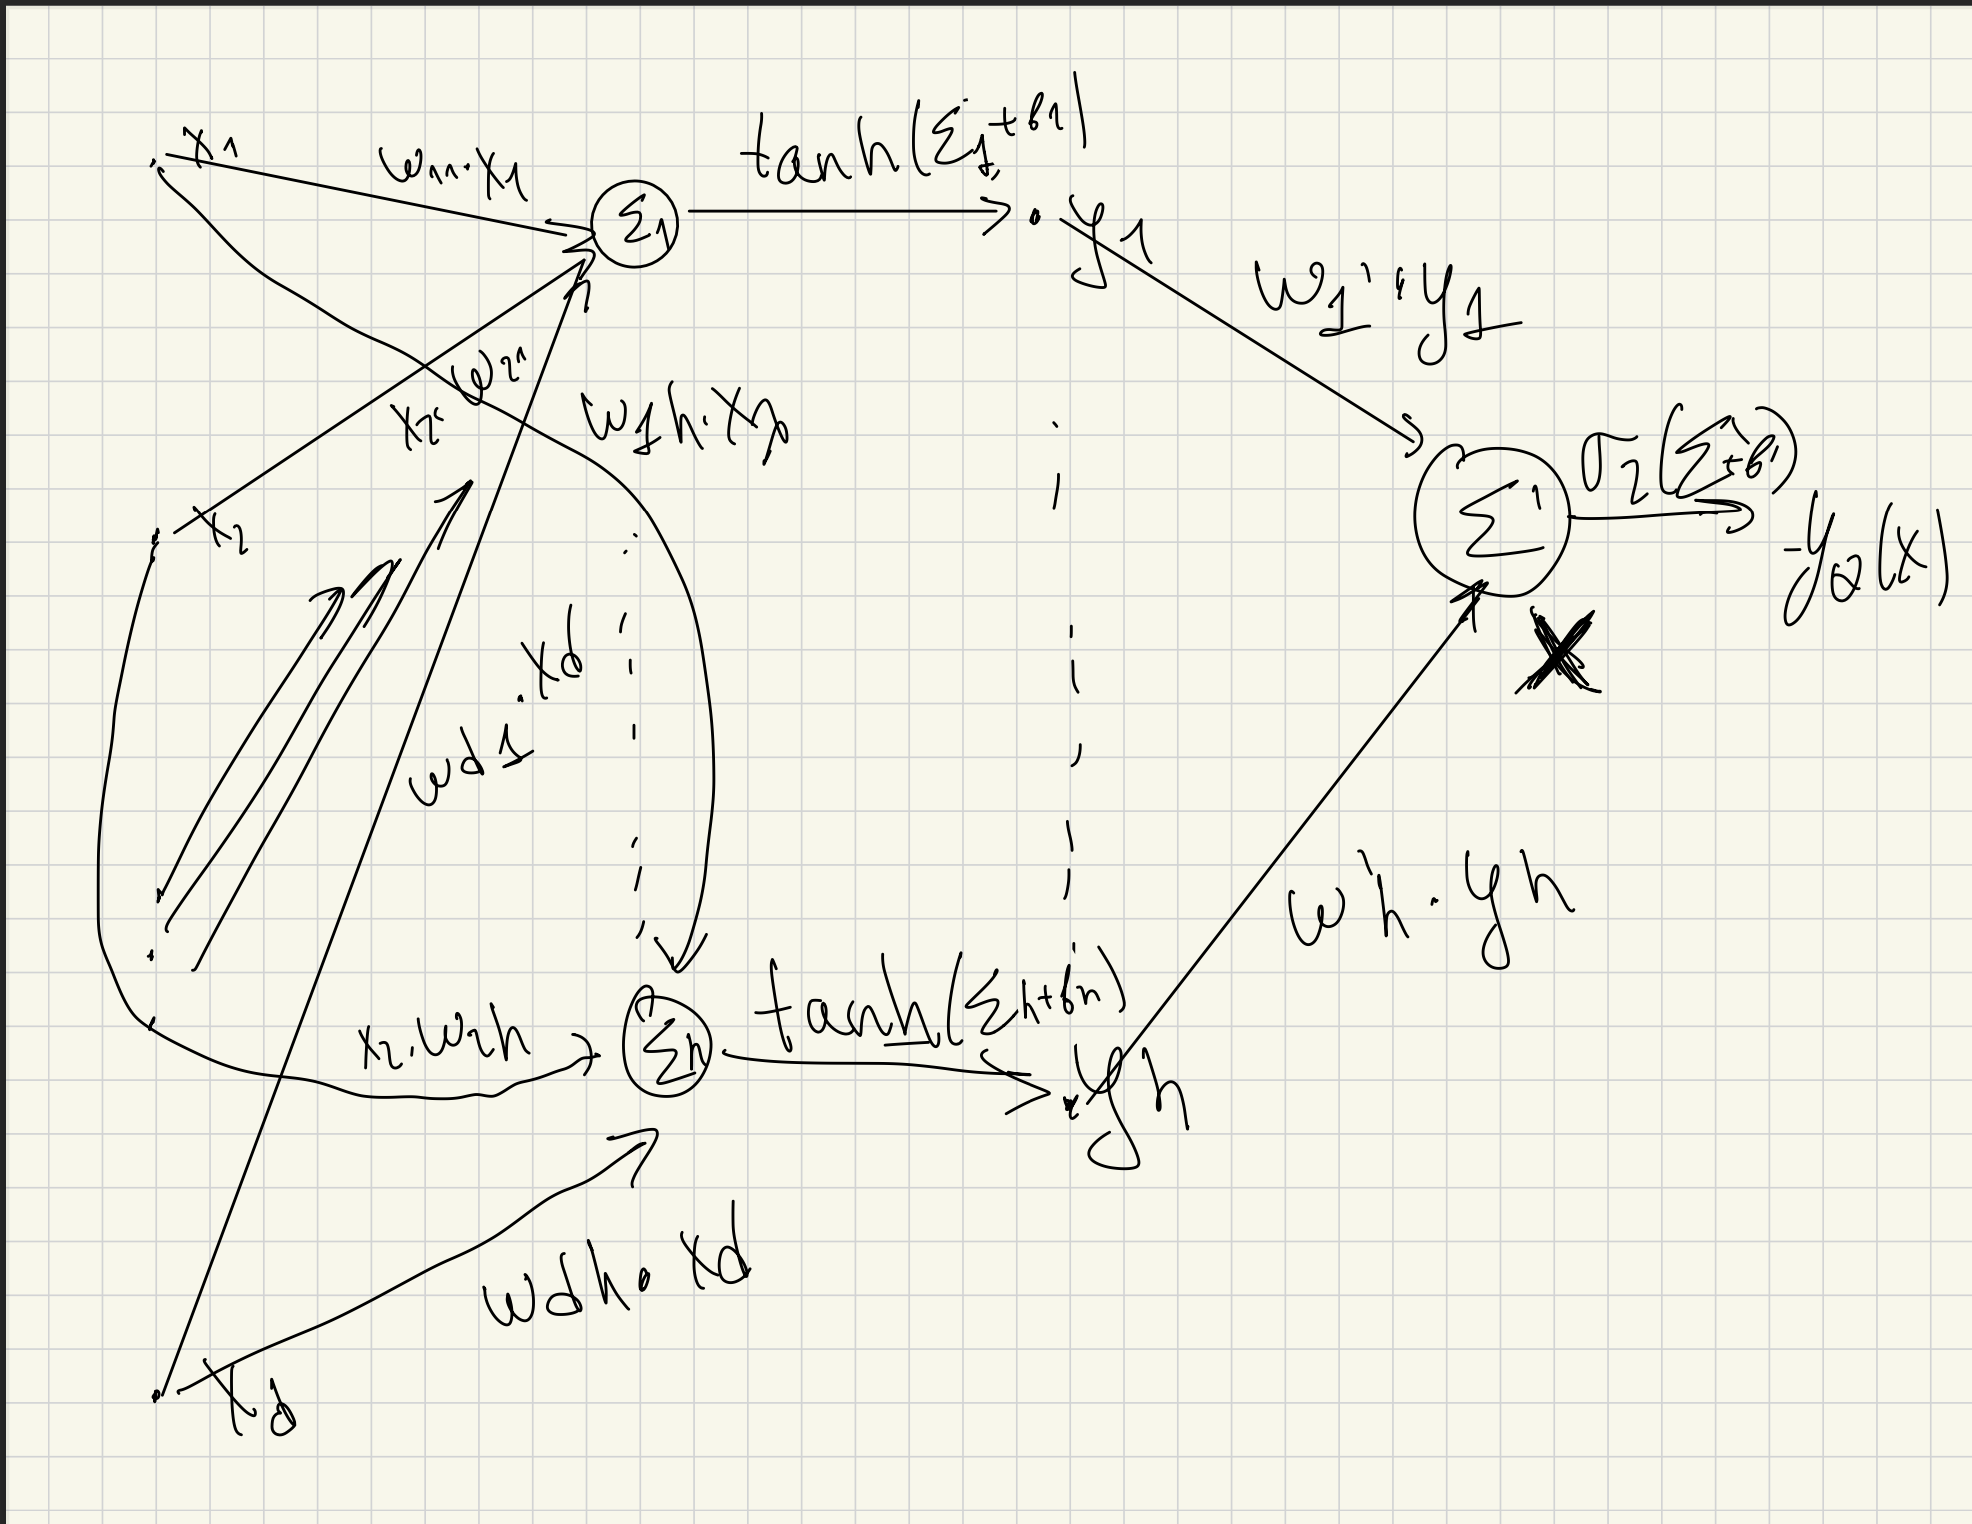

Обучаемые параметры нашей модели, соответственно это коэффициенты $b_{i}$ в количестве h штук и веса $w_{ij}$ в количестве hd штук также $b'$ - в количестве 1 штуки и $w'_{i}$ в количестве снова h штук. Тогда соответственно всего обучаемых параметров в нашей модели $hd + 1 + h + h = (d+2)h + 1$

**2.** Дана обучающая выборка $X \in \mathbb{R}^{n \times d}$ — матрица входных данных и $Y \in \{0, 1\}^{n}$ — таргет. Нейронная сеть обучается по этой выборке, минимизируя заданную функцию $\mathscr{L}$, в данном случае рассмотрим кросс энтропию
$$\mathscr{L}(\theta) = -\sum_{i=1}^n \big( Y_i \log y_\theta(X_i) + (1-Y_i) \log \left(1-y_\theta(X_i)\right) \big).$$

Наша цель — определить оптимальные параметры нашей модели, минимизируя функцию $\mathscr{L}(\theta)$ на заданном наборе данных. Мы будем решать эту задачу с помощью метода градиентного спуска, который требует вычисления производных по всем параметрам сети. Конечно, в данном случае несложно выписать все производные напрямую, с чем каждый из вас легко сможет справиться.

Однако прямое вычисление производных имеет квадратичную зависимость от количества параметров, что делает его неэффективным. Из-за этого мы не смогли бы быстро обучать глубокие нейронные сети. Хотя в данном случае речь идёт всего лишь о двух слоях, понимание работы методов на простых примерах было бы полезно.

На лекции был рассказан метод **обратного распространения ошибки (back propagation)** и показан его пример для двухслойной нейронной сети (на доске). Выпишите все необходимые производные для применения метода back propagation.

$\odot$ - посимвольное произведение ниже
\begin{align*}
    \frac{\partial y_\theta}{\partial W_2} &= \frac{\partial y_\theta}{\partial z_2} \cdot \frac{\partial z_2}{\partial W_2} = y_\theta (1 - y_\theta) \cdot y^\top \\
    \frac{\partial y_\theta}{\partial b_2} &= \frac{\partial y_\theta}{\partial z_2} = y_\theta (1 - y_\theta)
\end{align*}

$$
\frac{\partial y_\theta}{\partial y} = \frac{\partial y_\theta}{\partial z_2} \cdot W_2^\top = y_\theta (1 - y_\theta) \cdot W_2^\top
$$

$$\frac{\partial y_\theta}{\partial z_1} = \frac{\partial y_\theta}{\partial y} \odot (1 - y^2), \quad \text{где } z_1 = x^\top W_1 + b_1$$

\begin{align*}
    \frac{\partial y_\theta}{\partial W_1} &= x \cdot \left(\frac{\partial y_\theta}{\partial z_1}\right)^\top = x \cdot \left(y_\theta (1 - y_\theta) W_2^\top \odot (1 - y^2)\right)^\top \\
    \frac{\partial y_\theta}{\partial b_1} &= \frac{\partial y_\theta}{\partial z_1} = y_\theta (1 - y_\theta) W_2^\top \odot (1 - y^2)
\end{align*}

\begin{align*}
    \nabla_{W_2} y_\theta &= y_\theta (1 - y_\theta) \cdot y^\top \\
    \nabla_{b_2} y_\theta &= y_\theta (1 - y_\theta) \\
    \nabla_{W_1} y_\theta &= x \cdot \left(y_\theta (1 - y_\theta) W_2^\top \odot (1 - y^2)\right)^\top \\
    \nabla_{b_1} y_\theta &= y_\theta (1 - y_\theta) W_2^\top \odot (1 - y^2)
\end{align*}



**3.** Выпишите итоговый алгоритм обратного распространения ошибки для данной нейросети. Нужно записать все необходимые вычисления, включая все итоговые формулы производных. Подробно поясните, почему он имеет линейную сложность.

### Прямой проход (Forward Pass)
Для каждого примера $X_i$:
$z_1^{(i)} = X_i^T W_1 + b_1$
$y^{(i)} = \tanh(z_1^{(i)})$
$z_2^{(i)} = y^{(i)} W_2 + b_2$
$y_\theta^{(i)} = \sigma(z_2^{(i)}) = \frac{1}{1+e^{-z_2^{(i)}}}$

### Функция потерь (Кросс-энтропия)
$\mathcal{L}(\theta) = -\frac{1}{n}\sum_{i=1}^n [Y_i \log(y_\theta^{(i)}) + (1-Y_i)\log(1-y_\theta^{(i)})]$

### Обратный проход (Backpropagation)

1. Градиент по выходу:
$\alpha_2^{(i)} = \frac{\partial \mathcal{L}}{\partial z_2^{(i)}} = y_\theta^{(i)} - Y_i$

2. Градиенты для второго слоя:
$\frac{\partial \mathcal{L}}{\partial W_2} = \frac{1}{n}\sum_{i=1}^n \alpha_2^{(i)} \cdot y^{(i)T}$
$\frac{\partial \mathcal{L}}{\partial b_2} = \frac{1}{n}\sum_{i=1}^n \alpha_2^{(i)}$

3. Градиент по первому слою:
$\alpha_y^{(i)} = \alpha_2^{(i)} W_2^T$

4. Градиент через tanh:
$\alpha_1^{(i)} = \alpha_y^{(i)} \odot (1 - (y^{(i)})^2)$

5. Градиенты для первого слоя:
$\frac{\partial \mathcal{L}}{\partial W_1} = \frac{1}{n}\sum_{i=1}^n X_i \alpha_1^{(i)T}$
$\frac{\partial \mathcal{L}}{\partial b_1} = \frac{1}{n}\sum_{i=1}^n \alpha_1^{(i)}$


Метод back propagation помогает считать производные быстрее ввиду использования "производной сложной функции". Вместо того, чтобы пересчитывать производные каждый раз k раз, мы достаем уже посчитанные проиизводные и сводим асимптотику подсчета $O(n)$ с очевидного $O(n^2)$ как минимум (без учета времени подсчтеа каждой производной поотдельности) Вывод: метод back propagation помогает сэкономить очень сильно время на обучении.

**Внимание!** Решение, которое будет иметь сверхлинейную сложность, не будет оценено совсем. Считать производные вы все умеете, задача — вычислять их эффективно алгоритмически.

---
### <font color="orange"><i>Сложная часть</i></font>

---
### Задача 3.

**1.** На практике, чтобы сделать численные вычисления градиентов более стабильными, в качестве функции ошибки используют композицию бинарной кроссэнтропии и сигмоиды, передавая ей логиты в качестве аргументов, то есть выходы последнего линейного слоя. Выведите итоговую формулу градиента бинарной кроссэнтропии по выходу сети до применения сигмоиды.

Стоит отметить, что у нашей нейросети есть выходы $y_{i}$, тогда возьмем производные $\frac{\partial \mathscr{L}}{\partial x_{i}}$
Но мы знаем, что $\mathscr{L}(σ(x_{i}))$, поэтому можем воспользовавшись производной сложной функции получим результат
$$\nabla \mathscr{L} = \frac{\partial \mathscr{L}}{\partial x_{i}} = \frac{\partial \mathscr{L}}{\partial \sigma}\frac{\partial \sigma}{\partial x_{i}}$$
просто воспользовались производной сложной функции.

**2.** Реализуйте класс обучения нейронной сети из задачи 2 в sklearn-стиле, используя только библиотеку `numpy`. Используйте представленный ниже шаблон.

**Особенности:**
* Функция `_backward` должна реализовывать метод back propagation полностью на основе формул из задачи 2. Функция должна *накапливать* градиенты, подробнее см. <a href="https://thetahat.ru/courses/ad/main/4/nn_simple_examples">ноутбук с занятия по нейросетям</a>.
* При реализации функции `_backward` необходимо сразу посчитать производную функции ошибку по выходу сети до применения функции активации, что в коде реализуется функцией `output_gradient`. Это необходимо для повышения стабильности численных вычислений, что также используется в PyTorch.
* Желательно, чтобы градиент не зависел от размера входных данных, поэтому при вычислении градиентов по параметрам, рекомендуется разделить их на размер батча.
* При необходимости вы можете менять внутреннюю структуру методов, кроме методов `__init__`, `fit`, `predict`, `predict_proba`. В случае изменений исправляйте также документацию и типизацию аргументов, иначе оценка может быть снижена.
* **При реализации класса запрещено пользоваться ИИ-инструментами.** За исключением случаев обновления документации класса при необходимости.

In [29]:
class TwoLayersNNClassifier:
    """Двухслойная нейронная сеть для задачи бинарной классификации."""

    def __init__(
        self,
        input_size: int,
        hidden_size: int,
        learning_rate: float = 0.01,
        n_epoch: int = 100,
        weight_init_scale: float = 1,
    ):
        self.learning_rate = learning_rate
        self.n_epoch = n_epoch
        self.input_size = input_size
        self.hidden_size = hidden_size
        self.weight_init_scale = weight_init_scale

        # Инициализация весов
        self._initialize_weights()
        self._zero_grad()
        self.loss_history = []

    def _initialize_weights(self):
        """Инициализирует веса сети случайными значениями."""
        self.W1 = self._init_weight_matrix(self.input_size, self.hidden_size)
        self.b1 = self._init_weight_matrix(1, self.hidden_size)
        self.W2 = self._init_weight_matrix(self.hidden_size, 1)
        self.b2 = self._init_weight_matrix(1, 1)

    def _init_weight_matrix(self, rows: int, cols: int) -> np.ndarray:
        """Инициализирует матрицу весов случайными значениями."""
        return (np.random.rand(rows, cols) * 2 - 1) * self.weight_init_scale

    @staticmethod
    def tanh_derivative(x: np.ndarray) -> np.ndarray:
        """Вычисляет производную функции гиперболического тангенса."""
        return 1 - np.tanh(x)**2

    @staticmethod
    def sigmoid(x: np.ndarray, scale: int = 1000) -> np.ndarray:
        """Вычисляет логистическую сигмоиду."""
        x = np.clip(x, -scale, scale)
        return 1 / (1 + np.exp(-x))

    @staticmethod
    def binary_crossentropy(y_pred: np.ndarray, y_true: np.ndarray) -> float:
        """Вычисляет значение бинарной кросс-энтропии."""
        eps = 1e-15
        y_pred = np.clip(y_pred, eps, 1 - eps)
        return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

    @staticmethod
    def output_gradient(logits: np.ndarray, y: np.ndarray) -> np.ndarray:
        """Вычисляет градиент по выходу сети до применения сигмоиды."""
        sigmoid = lambda x: 1 / (1 + np.exp(-x))
        return sigmoid(logits) - y

    def _forward(self, X: np.ndarray) -> np.ndarray:
        """Выполняет прямой проход по сети."""
        self.sl1 = X @ self.W1 + self.b1
        self.asl1 = np.tanh(self.sl1)
        self.sl2 = self.asl1 @ self.W2 + self.b2
        self.asl2 = self.sigmoid(self.sl2)
        return self.asl2

    def _backward(self, X: np.ndarray, y: np.ndarray):
        """Выполняет обратный проход (backpropagation)."""
        # Градиент по выходу
        ds2 = self.asl2 - y

        # Градиенты второго слоя
        self.dW2 = self.asl1.T @ ds2
        self.db2 = np.sum(ds2, axis=0, keepdims=True)

        # Градиент по первому слою
        ds1 = (ds2 @ self.W2.T) * self.tanh_derivative(self.sl1)
        self.dW1 = X.T @ ds1
        self.db1 = np.sum(ds1, axis=0, keepdims=True)

    def _step(self):
        """Обновляет веса сети."""
        self.W1 -= self.learning_rate * self.dW1
        self.b1 -= self.learning_rate * self.db1
        self.W2 -= self.learning_rate * self.dW2
        self.b2 -= self.learning_rate * self.db2

    def _zero_grad(self):
        """Обнуляет градиенты."""
        self.dW1 = np.zeros_like(self.W1)
        self.db1 = np.zeros_like(self.b1)
        self.dW2 = np.zeros_like(self.W2)
        self.db2 = np.zeros_like(self.b2)

    def _show_progress(self, epoch: int, plot_freq: int):
        """Выводит прогресс обучения."""
        info_text = f"Эпоха {epoch + 1}/{self.n_epoch}, Лосс: {self.loss_history[-1]:.4f}"

        if plot_freq == 0:
            clear_output(wait=True)
            print(info_text)
        elif (epoch + 1) % plot_freq == 0:
            clear_output(wait=True)
            plt.figure(figsize=(8, 4))
            plt.plot(self.loss_history)
            plt.xlabel("Номер эпохи")
            plt.ylabel("Лосс")
            plt.title(info_text)
            plt.show()

    def fit(self, X: np.ndarray, y: np.ndarray, verbose: bool = True, plot_freq: int = 0):
        """Обучает модель на предоставленных данных."""
        y = y.reshape(-1, 1)
        self.loss_history = []

        for epoch in range(self.n_epoch):
            # Прямой проход
            y_pred = self._forward(X)
            loss = self.binary_crossentropy(y_pred, y)
            self.loss_history.append(loss)

            # Обратный проход и обновление весов
            self._backward(X, y)
            self._step()
            self._zero_grad()

            if verbose:
                self._show_progress(epoch, plot_freq)

    def predict(self, X: np.ndarray) -> np.ndarray:
        """Предсказывает классы для входных данных."""
        proba = self._forward(X)
        return (proba > 0.5).astype(int).flatten()

    def predict_proba(self, X: np.ndarray) -> np.ndarray:
        """Возвращает вероятности принадлежности к классам."""
        prob_class_1 = self._forward(X)
        prob_class_0 = 1 - prob_class_1
        return np.hstack((prob_class_0, prob_class_1))

**3.** Сгенерируем искусственные данные

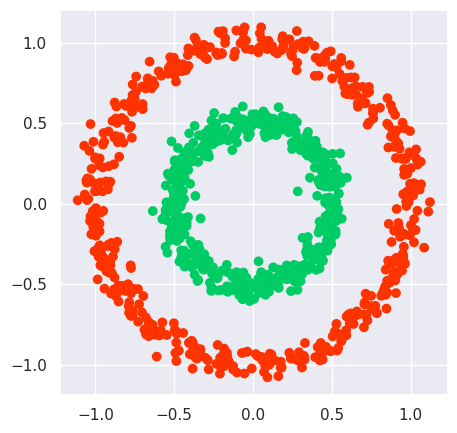

In [30]:
# Генерация данных
n_samples = 1024
X, y = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.05)

# Визуализация данных
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
plt.show()

Обучите реализованную ранее нейросеть решать задачу классификации на основе этой выборки.

*Периодически во время обучения рисуйте график лосса. Если он возрастает, стоит поискать ошибку.*

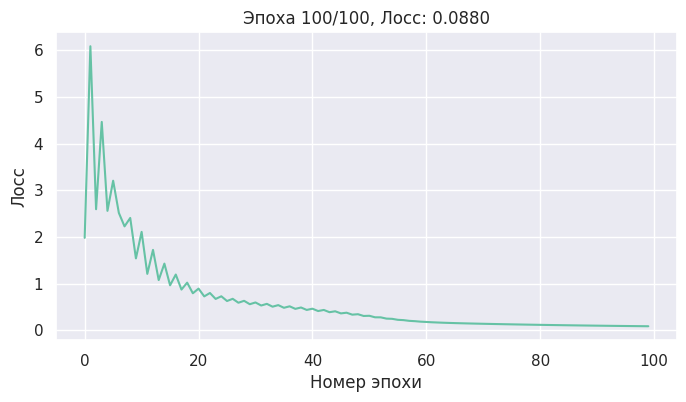

In [42]:
model = TwoLayersNNClassifier(input_size=2, hidden_size=100,
                            learning_rate=0.001, n_epoch=100)
model.fit(X, y, verbose=True, plot_freq=5)

С помощью функции `np.meshgrid` создайте двухмерную сетку в диапазоне $[-1.5, 1.5]$ по каждой координате с шагом не более $0.02$. Для каждой точки сетки посчитайте оценки вероятностей принадлежности тому или иному классу.

In [46]:
# Создаем сетку в диапазоне [-1.5, 1.5] с шагом 0.02
x_min, x_max = -1.5, 1.5
y_min, y_max = -1.5, 1.5
step = 0.02
xx, yy = np.meshgrid(np.arange(x_min, x_max, step),
                     np.arange(y_min, y_max, step))

# Преобразуем сетку в массив точек для предсказания
grid_points = np.c_[xx.ravel(), yy.ravel()]

# Вычисляем вероятности для каждой точки сетки
probs = model.predict_proba(grid_points)[:, 1]  # Вероятность класса 1
probs = probs.reshape(xx.shape)  # Возвращаем к форме сетки

Визуализируйте полученные предсказания классов и вероятностей.

*Если у вас получилось плохое качество, попробуйте увеличить количество нейронов. Если не помогает, возможно, где-то ошибка.*

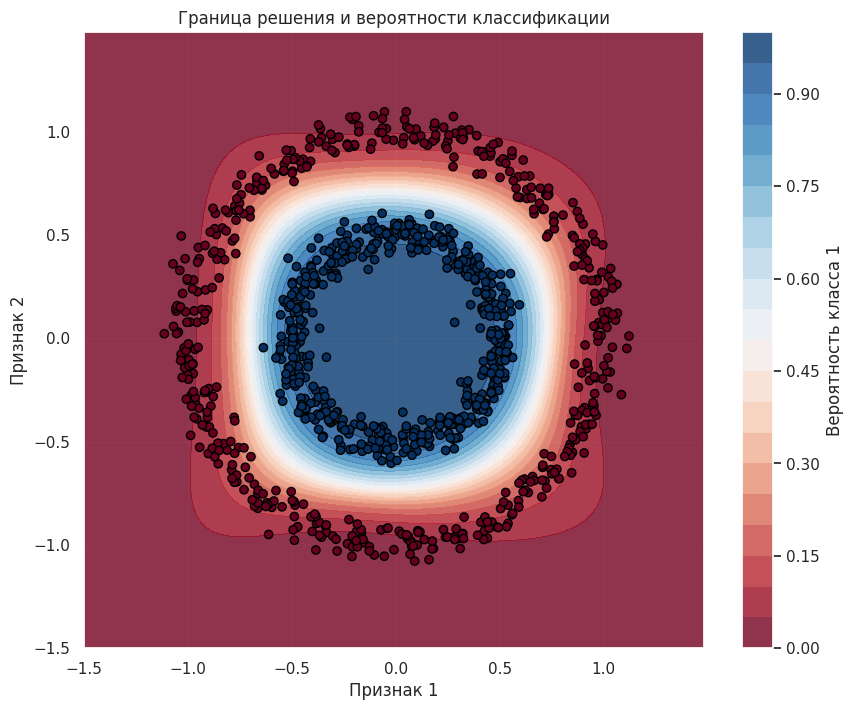

In [47]:
plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, probs, levels=20, cmap='RdBu', alpha=0.8)
plt.colorbar(label='Вероятность класса 1')
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='RdBu', edgecolors='k')
plt.title('Граница решения и вероятности классификации')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.show()

Немного увеличим разброс данных

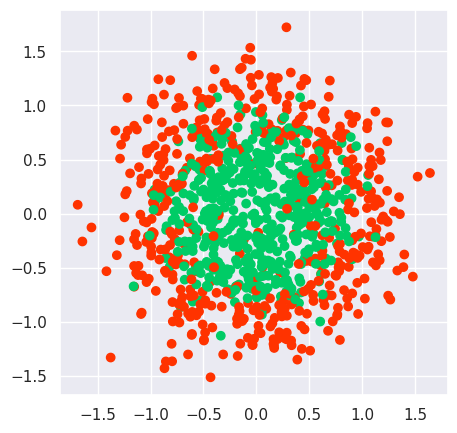

In [48]:
# Генерация данных
n_samples = 1024
X, y = datasets.make_circles(n_samples=n_samples, factor=0.5, noise=0.25)

# Визуализация данных
plt.figure(figsize=(5, 5))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cm_bright)
plt.show()

Повторите те же действия с новыми данными.

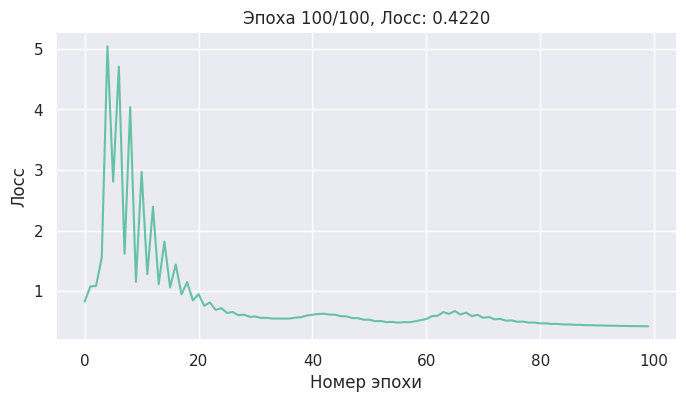

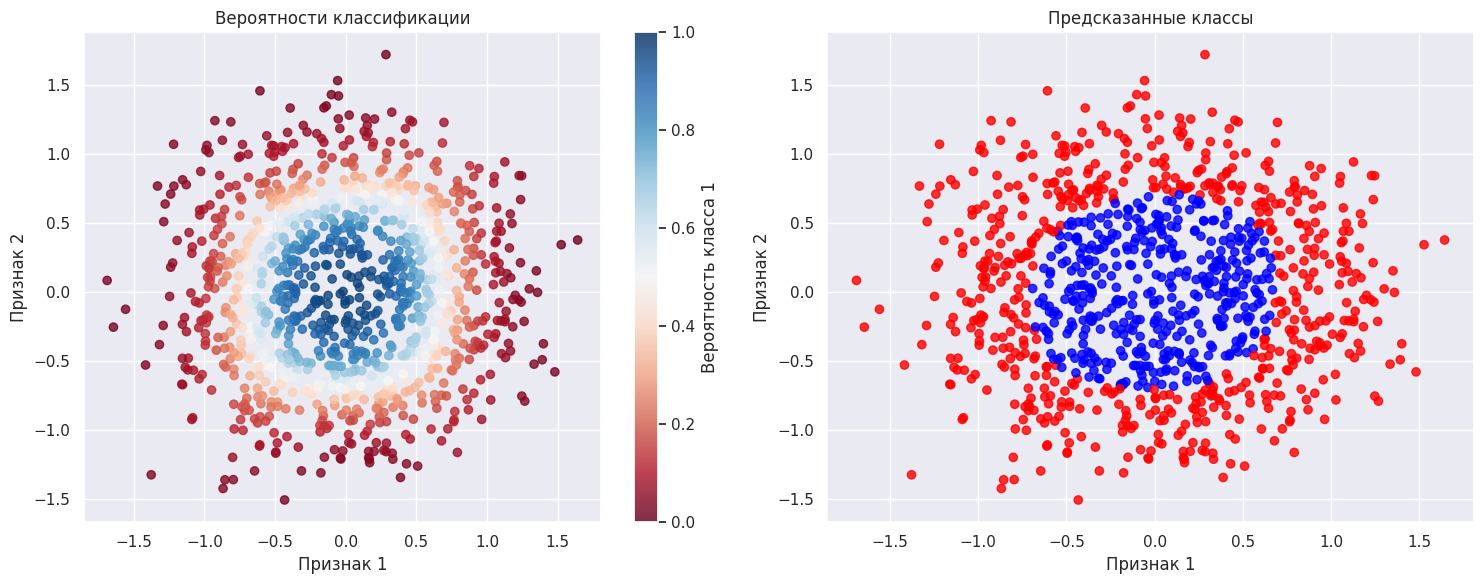

In [54]:
# Создаем и обучаем модель
model = TwoLayersNNClassifier(input_size=2, hidden_size=100,
                            learning_rate=0.001, n_epoch=100)
model.fit(X, y, verbose=True, plot_freq=20)

# Вычисляем вероятности для каждой точки
probs = model.predict_proba(X)[:, 1]  # Вероятность класса 1

# Визуализация
plt.figure(figsize=(15, 6))

# 1. Визуализация вероятностей
plt.subplot(1, 2, 1)
scatter = plt.scatter(X[:, 0], X[:, 1], c=probs, cmap='RdBu', vmin=0, vmax=1, alpha=0.8)
plt.colorbar(scatter, label='Вероятность класса 1')
plt.title('Вероятности классификации')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

# 2. Визуализация предсказанных классов
plt.subplot(1, 2, 2)
pred_classes = model.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=pred_classes, cmap=ListedColormap(['red', 'blue']), alpha=0.8)
plt.title('Предсказанные классы')
plt.xlabel('Признак 1')
plt.ylabel('Признак 2')

plt.tight_layout()
plt.show()

**Выводы:**

Можем заметить, что $Loss$ не опускается ниже определенного значения, потому что данные очень сильно перемешаны и линейная модель не может "разделить данные", т.к линейной модели это просто "тяжелее" различить

**4.** Теперь давайте применим нашу нейронную сеть к данным MNIST.

Загрузите данные. Для этого воспользуйтесь кодом из задачи 1. Обратите внимание, что поскольку наша сеть реализована на `numpy` и принимает `numpy`-матрицы, потребуется предварительно перевести `torch`-тензоры в `numpy`-массивы.

Поскольку наша сеть была разработана для бинарной классификации, мы будем рассматривать изображения, на которых представлены только две цифры: `0` и `1`. Возьмите по 1000 изображений каждого символа и преобразуйте их в векторы. Также выделите изображения из тестовой выборки, соответствующие этим цифрам.

In [63]:
def load_mnist_01(num_samples=1000):
    transform = transforms.ToTensor()
    train_data = datasets.MNIST(root='data', train=True, download=True, transform=transform)
    test_data = datasets.MNIST(root='data', train=False, download=True, transform=transform)

    # Фильтрация только 0 и 1
    def filter_01(dataset):
        indices = (dataset.targets == 0) | (dataset.targets == 1)
        dataset.data = dataset.data[indices]
        dataset.targets = dataset.targets[indices]
        return dataset

    train_data = filter_01(train_data)
    test_data = filter_01(test_data)

    # Подготовка данных
    def prepare_data(dataset, num_samples=None):
        # Если num_samples=None, используем все данные
        zeros = dataset.data[dataset.targets == 0]
        ones = dataset.data[dataset.targets == 1]

        if num_samples is not None:
            zeros = zeros[:num_samples]
            ones = ones[:num_samples]

        images = torch.cat([zeros, ones]).numpy()
        labels = torch.cat([
            torch.zeros(len(zeros)),
            torch.ones(len(ones))
        ]).numpy()

        images = images.reshape(-1, 28*28) / 255.0
        return images, labels

    X_train, y_train = prepare_data(train_data, num_samples)
    X_test, y_test = prepare_data(test_data)  # Для теста берем все доступные примеры

    return X_train, y_train, X_test, y_test

# Загружаем данные
X_train, y_train, X_test, y_test = load_mnist_01(num_samples=1000)

Обучите реализованную ранее нейронную сеть к этим данным.


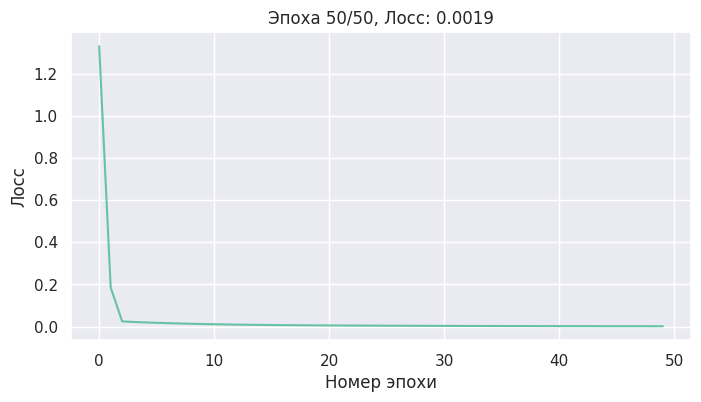

In [64]:
model = TwoLayersNNClassifier(input_size=784, hidden_size=64,
                            learning_rate=0.001, n_epoch=50)
model.fit(X_train, y_train, verbose=True, plot_freq=5)

Посчитайте качество обученной нейросети на тестовой выборке. Можете ли вы сказать, насколько хорошо сеть обучилась?

In [65]:
# 7. Оценка на тестовых данных
test_pred = model.predict(X_test)
accuracy = np.mean(test_pred == y_test)
print(f"\nTest Accuracy: {accuracy:.4f}")


Test Accuracy: 0.9948


**Выводы:**

Можем заметить, что наша модель обучилась отлично на данных и выдает отличные результаты на бинарной классификации MNIST.

---
### Задача 4.

Рассмотрим глубокую нейронную сеть, которая
* принимает на вход $x\in\mathbb{R}^d$,
* возвращает $y\in\{0, 1\}$,
* содержит $99$ полносвязных слоев (`Linear`) с функцией активации $\tanh$, за исключением последнего слоя,
* последний слой использует функцию активации логистическая сигмоида.

В качестве лосса $\mathscr{L}(\theta)$ возьмем кросс-энтропию.

**1.** Распишите градиент лосса по весам первого слоя $W_1$. Какова сложность этой операции?

...

Нарисуйте график функции активации и ее производной.

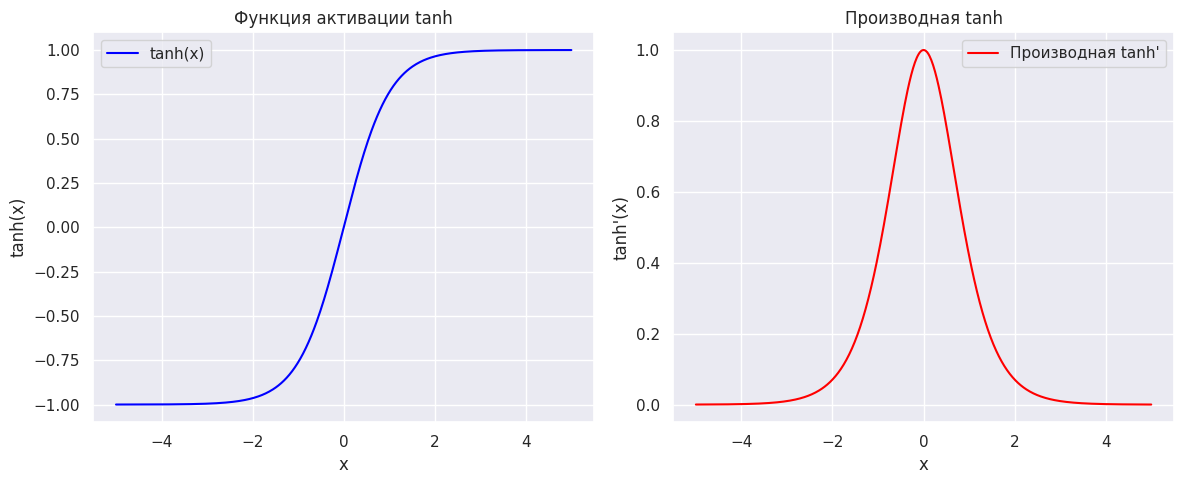

In [66]:
x = np.linspace(-5, 5, 500)
y_tanh = np.tanh(x)
y_tanh_deriv = 1 - np.tanh(x)**2

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(x, y_tanh, label='tanh(x)', color='blue')
plt.title('Функция активации tanh')
plt.xlabel('x')
plt.ylabel('tanh(x)')
plt.grid(True)
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(x, y_tanh_deriv, label="Производная tanh'", color='red')
plt.title('Производная tanh')
plt.xlabel('x')
plt.ylabel("tanh'(x)")
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

На основе графика проанализируйте, что будет происходить с градиентом по весам первого слоя, если нейросеть "ненулевая", иначе говоря, на промежуточных слоях может выдавать различные значения, в том числе довольно большие.

Он будет затухать на большом количестве слоев, из-за чего добавлять слои с данной фуккцией активации станет времязатратно, притом что результата будет заметно меньше.

**2.** Реализуйте эту нейросеть на **PyTorch**.

*Примечание.* Каждый слой должен быть инициализирован отдельно. Нельзя создавать копии уже инициализированного слоя.

In [74]:
# При реализации нейросети запрещено пользоваться ИИ-инструментами.

layers = []
layers.append(nn.Linear(784, 64))
layers.append(nn.Tanh())
for _ in range(3):
  layers.append(nn.Linear(64, 64))
  layers.append(nn.Tanh())
layers.append(nn.Linear(64, 1))
layers.append(nn.Sigmoid())
model = nn.Sequential(*layers)

Аналогично задаче 3 попробуйте обучить эту нейросеть для классификации изображений с цифрами 0 и 1 из датасета MNIST. Скорее всего весь датасет не поместится в память, поэтому предлагается использовать случайную подвыборку (батч) размера 32 на каждом шаге обучения.

Epoch 1/5, Loss: 0.6912
Epoch 2/5, Loss: 0.6910
Epoch 3/5, Loss: 0.6895
Epoch 4/5, Loss: 0.6909
Epoch 5/5, Loss: 0.6905


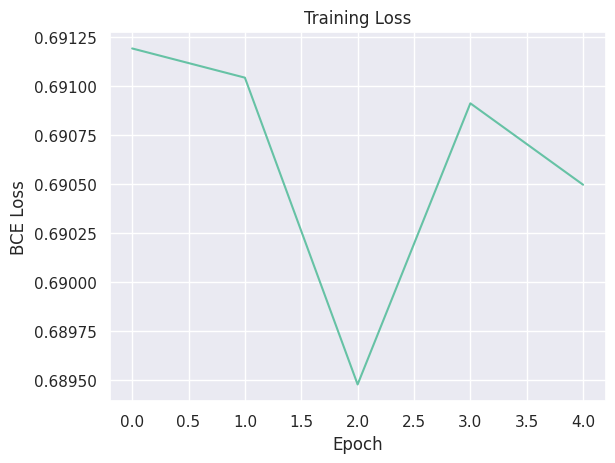

Test Accuracy: 53.66%


In [82]:
# 1. Подготовка данных
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))  # Нормализация
])

# Загрузка и фильтрация данных (только 0 и 1)
def load_filtered_mnist(train=True):
    dataset = datasets.MNIST(root='./data', train=train, download=True, transform=transform)
    indices = (dataset.targets == 0) | (dataset.targets == 1)
    dataset.data = dataset.data[indices]
    dataset.targets = dataset.targets[indices]
    return dataset

train_data = load_filtered_mnist(train=True)
test_data = load_filtered_mnist(train=False)

# 2. Создание модели (ровно как вы просили)
model = nn.Sequential(
    nn.Linear(784, 64),
    nn.Tanh(),
    *[layer for _ in range(97) for layer in (nn.Linear(64, 64), nn.Tanh())],
    nn.Linear(64, 1),
    nn.Sigmoid()
)

# 3. Настройка обучения
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.BCELoss()

# 4. Обучение с батчами
batch_size = 32
epochs = 5  # Уменьшено для примера
loss_history = []

for epoch in range(epochs):
    # Случайная подвыборка на каждом шаге
    indices = torch.randperm(len(train_data))[:batch_size*100]  # 100 батчей на эпоху
    train_loader = DataLoader(Subset(train_data, indices), batch_size=batch_size, shuffle=True)

    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs = inputs.view(-1, 784).to(device)  # Преобразуем в вектор
        labels = labels.float().to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs.squeeze(), labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    loss_history.append(epoch_loss)
    print(f'Epoch {epoch+1}/{epochs}, Loss: {epoch_loss:.4f}')

# 5. Визуализация и оценка
plt.plot(loss_history)
plt.title('Training Loss')
plt.xlabel('Epoch')
plt.ylabel('BCE Loss')
plt.show()

# Тестирование
test_loader = DataLoader(test_data, batch_size=batch_size)
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs = inputs.view(-1, 784).to(device)
        labels = labels.float().to(device)

        outputs = model(inputs)
        predicted = (outputs > 0.5).float()
        total += labels.size(0)
        correct += (predicted.squeeze() == labels).sum().item()

print(f'Test Accuracy: {100 * correct / total:.2f}%')

Постройте график зависимости среднего и максимального абсолютного значения градиента по весам для каждого слоя от номера слоя.

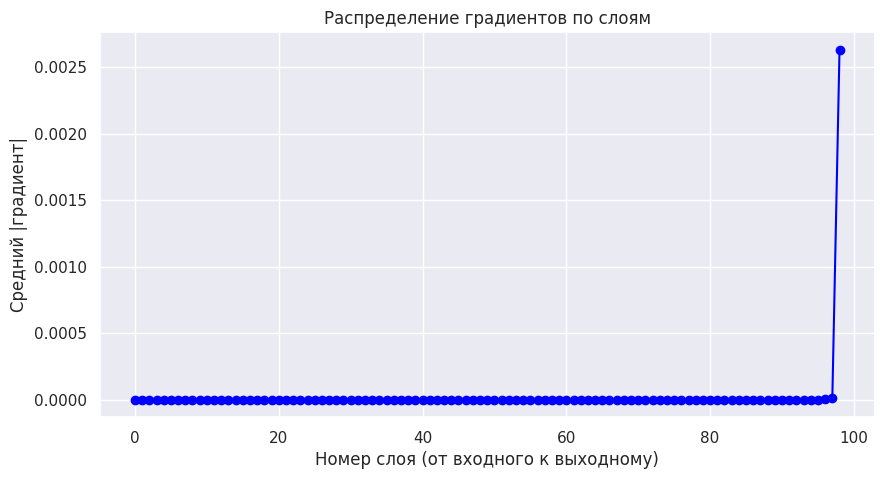

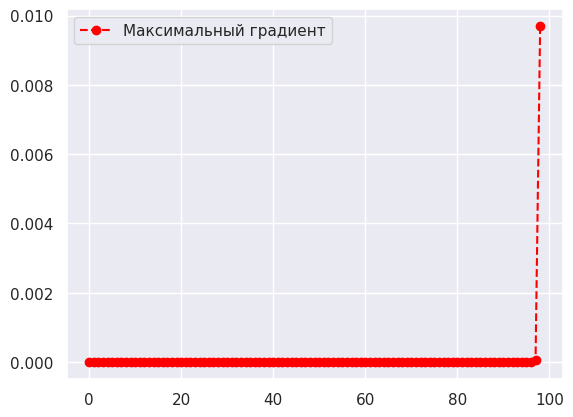

In [86]:
# Упрощенная функция для сбора градиентов
def get_gradients(model):
    grads = []
    for name, param in model.named_parameters():
        if param.grad is not None and 'weight' in name:  # Только веса слоев
            grads.append(param.grad.abs().mean().item())
    return grads

# Модифицированный цикл обучения
def simple_train(model, train_loader, epochs=3):
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    criterion = torch.nn.BCELoss()

    # Для хранения градиентов
    all_gradients = []

    for epoch in range(epochs):
        for inputs, labels in train_loader:
            inputs = inputs.view(-1, 784)
            labels = labels.float()

            optimizer.zero_grad()
            outputs = model(inputs)
            loss = criterion(outputs.squeeze(), labels)
            loss.backward()

            # Собираем градиенты
            if epoch == epochs - 1:  # Только последняя эпоха
                all_gradients.append(get_gradients(model))

            optimizer.step()

    return all_gradients

# Запускаем обучение
train_loader = torch.utils.data.DataLoader(train_data, batch_size=32, shuffle=True)
gradients = simple_train(model, train_loader)

# Усредняем градиенты по всем батчам
avg_gradients = torch.tensor(gradients).mean(dim=0)

# Простой график
plt.figure(figsize=(10, 5))
plt.plot(avg_gradients.numpy(), 'b-o')
plt.xlabel('Номер слоя (от входного к выходному)')
plt.ylabel('Средний |градиент|')
plt.title('Распределение градиентов по слоям')
plt.grid(True)
plt.show()
# Добавьте это перед plt.show()
max_gradients = torch.tensor(gradients).max(dim=0)[0]
plt.plot(max_gradients.numpy(), 'r--o', label='Максимальный градиент')
plt.legend()

**Выводы:**

Можем заметить, что в какой то момент у нашей функции начинают "взлетать градиенты", что приводит к нестабильности при обучении. Поэтому можем заметить, что test_accuracy порядка 50%, что несильно лучше, чем просто наугад называть 0 и 1, хотя если попробовать уменьшить количество слоев, можно заметить, что test_accuracy можно поднять до 99%, поэтому стоит быть аккуратным при выборе количества слоев нашей нейросети, это может очень сильно влиять на accuracy и обучение в частности из-за взрыва градиентов и затухания как в этом случае.


*Примечание.* Подобная ситуация известна как "паралич" нейросети. Именно поэтому такие функции активации, как ReLU, стали очень популярными. Для преодоления этого паралича существует множество методов, многие из которых мы рассмотрим на 3 курсе.